# Airline On-Time Performance Data Exploratory Analysis
## Introduction
Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out. 

The dataset used consists of flight arrival and departure details for all commercial flights within the USA in 2007. It is a large dataset with nearly 7.5 million records in total, and takes up 1.2 gigabytes of space. The data comes originally from RITA where it is described in detail. You can download the data [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7).

**However only data for 2007 will be used for this project**

Variable descriptions: 

S/N | Name | Description 
-- | -- | --
1 | `Year` | 1987-2008 (2007 for this analysis)
2 | `Month` | 1-12 
3 | `DayofMonth` | 1-31 
4 | `DayOfWeek` | 1 (Monday) - 7 (Sunday) 
5 | `DepTime` | actual departure time (local, hhmm) 
6 | `CRSDepTime` | scheduled departure time (local, hhmm) 
7 | `ArrTime` | actual arrival time (local, hhmm) 
8 | `CRSArrTime` | scheduled arrival time (local, hhmm) 
9 | `UniqueCarrier` | unique carrier code 
10 | `FlightNum` | flight number 
11 | `TailNum` | plane tail number 
12 | `ActualElapsedTime` | actual elapsed time in minutes 
13 | `CRSElapsedTime` | scheduled elapsed time in minutes 
14 | `AirTime` | the time from the moment an aircraft leaves the surface until it comes into contact with the surface at the next point of landing;,in minutes 
15 | `ArrDelay` | arrival delay, in minutes 
16 | `DepDelay` | departure delay, in minutes 
17 | `Origin` | origin, IATA airport code 
18 | `Dest` | destination, IATA airport code 
19 | `Distance` | distance covered, in miles 
20 | `TaxiIn` | taxi in time, in minutes 
21 | `TaxiOut` | taxi out time in minutes 
22 | `Cancelled` | was the flight cancelled? 
23 | `CancellationCode` | reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
24 | `Diverted` | 1 = yes, 0 = no 
25 | `CarrierDelay` | delay within air carrier's control, in minutes 
26 | `WeatherDelay` | delay caused by extreme weather conditions, in minutes 
27 | `NASDelay` | delay within the NAS control, in minutes 
28 | `SecurityDelay` | delay due to security checks, breach or faulty security equipment, in minutes 
29 | `LateAircraftDelay` | delay due to the late arrival of the same aircraft at a previous airport, in minutes

* The International Air Transport Association's (IATA) Location Identifier is a unique 3-letter code (also commonly known as IATA code) used in aviation and also in logistics to identify an airport.
* A computer reservation system or a central reservation system (CRS) is a web-based software used by travel agencies and travel management companies to retrieve and conduct transactions related to air travel, hotels, car rental, or other activities. 

**Questions of Interest for the 2007 data**
1. Were there more delayed flights than there were early or on-time flights?
1. How does the number of registered flights vary per month?
2. What is the distribution of early, on-time, delayed and cancelled flights per month?
3. What is the distribution of daily flight cancellations?
4. How does the number of registered flights compare amongst airlines?
5. What is the distribution of delays for the top airlines?

In [1]:
# import modules and libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calplot
import math # for .floor and .ceil

# suppressing SettingWithCopyWarning
pd.options.mode.chained_assignment = None # default='warn'

pd.set_option('display.max.columns', 500)
plt.style.use('seaborn-dark-palette')
%matplotlib inline

## Data Wrangling

### Gathering data

In [2]:
airline_df = pd.read_csv('flightdata_2007.csv')
airports = pd.read_csv('airports.csv')
carriers = pd.read_csv('carriers.csv')
plane_data = pd.read_csv('plane-data.csv')

In [3]:
airline_df.shape

(7453215, 29)

It's a reasonably sized data with 7.4 million entries and 29 variables

### Assessing the data

In [4]:
airline_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3,9,0,NaN,0,0,0,0,0,0


In [5]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

Percentage of missing values per column

In [6]:
percentNaN = airline_df.isnull().sum()/len(airline_df) * 100
percentNaN

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               2.156761
CRSDepTime            0.000000
ArrTime               2.387252
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.000295
ActualElapsedTime     2.387252
CRSElapsedTime        0.013337
AirTime               2.387252
ArrDelay              2.387252
DepDelay              2.156761
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.000000
TaxiOut               0.000000
Cancelled             0.000000
CancellationCode     97.843226
Diverted              0.000000
CarrierDelay          0.000000
WeatherDelay          0.000000
NASDelay              0.000000
SecurityDelay         0.000000
LateAircraftDelay     0.000000
dtype: float64

`CancellationCode` seems to have the highest percentage of NaN values but that's expected because it shows that a huge majority of the flights weren't cancelled.

In [7]:
percentNaN[percentNaN != 0]

DepTime               2.156761
ArrTime               2.387252
TailNum               0.000295
ActualElapsedTime     2.387252
CRSElapsedTime        0.013337
AirTime               2.387252
ArrDelay              2.387252
DepDelay              2.156761
CancellationCode     97.843226
dtype: float64

Let's look at the data for the above variables excluding `CancellationCode`

In [8]:
airline_df[airline_df.DepTime.isnull()].sample(15)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
772484,2007,2,13,2,NaN,1911,NaN,2043,OH,5521,N528CA,NaN,92.0,NaN,NaN,NaN,BOS,JFK,187,0,0,1,B,0,0,0,0,0,0
1143102,2007,2,25,7,NaN,1200,NaN,1425,B6,334,0,NaN,145.0,NaN,NaN,NaN,PBI,IAD,859,0,0,1,A,0,0,0,0,0,0
6429805,2007,11,16,5,NaN,1815,NaN,1922,OO,5444,0,NaN,67.0,NaN,NaN,NaN,SFO,SBP,191,0,0,1,C,0,0,0,0,0,0
1624647,2007,3,23,5,NaN,1705,NaN,1835,MQ,4544,0,NaN,90.0,NaN,NaN,NaN,BOS,EWR,200,0,0,1,C,0,0,0,0,0,0
1709772,2007,3,16,5,NaN,1845,NaN,2145,AA,1050,0,NaN,180.0,NaN,NaN,NaN,MIA,EWR,1086,0,0,1,B,0,0,0,0,0,0
1534471,2007,3,2,5,NaN,745,NaN,1048,EV,4311,N832AS,NaN,123.0,NaN,NaN,NaN,ICT,ATL,781,0,0,1,C,0,0,0,0,0,0
1633162,2007,3,11,7,NaN,625,NaN,821,NW,152,N8926E,NaN,176.0,NaN,NaN,NaN,PHL,MSP,980,0,0,1,A,0,0,0,0,0,0
103896,2007,1,8,1,NaN,1540,NaN,1745,XE,3072,0,NaN,125.0,NaN,NaN,NaN,EWR,CLT,529,0,0,1,C,0,0,0,0,0,0
3227741,2007,6,28,4,NaN,1655,NaN,1802,YV,7469,N37208,NaN,67.0,NaN,NaN,NaN,IAD,PIT,183,0,0,1,C,0,0,0,0,0,0
2287209,2007,4,1,7,NaN,1514,NaN,1617,NW,1727,N940N,NaN,123.0,NaN,NaN,NaN,DTW,MCI,629,0,0,1,A,0,0,0,0,0,0


I suspect that most missing values in the other columns are as a result of the flight being cancelled and as such, the flight can't have an arrival time or departure time. Let's look for missing data in the flights that weren't cancelled.

In [9]:
flights_NotCancelled = airline_df.query('Cancelled == 0')

In [10]:
percentNaN = flights_NotCancelled.isnull().sum()/len(airline_df) * 100
percentNaN[percentNaN != 0]

ArrTime               0.230491
ActualElapsedTime     0.230491
CRSElapsedTime        0.009754
AirTime               0.230491
ArrDelay              0.230491
CancellationCode     97.843226
dtype: float64

Notice that it's just an insignificant amount that contains NaN values. Let's have a look at it.

In [11]:
# selecting the missing values in the flights that weren't cancelled
# dropping the CancellationCode column first
flights_NotCancelled[flights_NotCancelled.drop('CancellationCode', axis=1).ArrDelay.isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3340,2007,1,2,2,802.0,755,NaN,1115,WN,837,N650SW,NaN,140.0,NaN,NaN,7.0,STL,MCO,880,0,8,0,NaN,1,0,0,0,0,0
8000,2007,1,4,4,1627.0,1610,NaN,1735,WN,2474,N246,NaN,85.0,NaN,NaN,17.0,LAS,RNO,345,0,15,0,NaN,1,0,0,0,0,0
8014,2007,1,4,4,1951.0,1905,NaN,2005,WN,2860,N357,NaN,60.0,NaN,NaN,46.0,LAS,SAN,258,0,9,0,NaN,1,0,0,0,0,0
8447,2007,1,4,4,845.0,845,NaN,1245,WN,76,N625SW,NaN,180.0,NaN,NaN,0.0,MDW,FLL,1166,0,7,0,NaN,1,0,0,0,0,0
8827,2007,1,4,4,1052.0,840,NaN,1000,WN,102,N619SW,NaN,80.0,NaN,NaN,132.0,OMA,MDW,423,0,8,0,NaN,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7450737,2007,12,13,4,1158.0,1200,NaN,1427,DL,670,N642DL,NaN,147.0,NaN,NaN,-2.0,ATL,BOS,946,0,16,0,NaN,1,0,0,0,0,0
7451337,2007,12,13,4,653.0,700,NaN,920,DL,1465,N3751B,NaN,320.0,NaN,NaN,-7.0,TPA,LAX,2158,0,38,0,NaN,1,0,0,0,0,0
7451634,2007,12,13,4,1151.0,1155,NaN,1500,DL,1777,N935DL,NaN,185.0,NaN,NaN,-4.0,PBI,BOS,1197,0,12,0,NaN,1,0,0,0,0,0
7451702,2007,12,13,4,1153.0,1200,NaN,1507,DL,1844,N904DE,NaN,187.0,NaN,NaN,-7.0,RSW,BOS,1249,0,12,0,NaN,1,0,0,0,0,0


It looks like all the missing values, except for `CancellationCode` are as a result of the flight being diverted. How true is that? 

In [12]:
flights_NotCancelled[flights_NotCancelled.drop('CancellationCode', axis=1).ArrDelay.isnull()].Diverted.value_counts()

1    17179
Name: Diverted, dtype: int64

In [13]:
flights_NotCancelled[flights_NotCancelled.drop('CancellationCode', axis=1).CRSElapsedTime.isnull()].Diverted.value_counts()

1    727
Name: Diverted, dtype: int64

In [14]:
# clear flights_NotCancelled from memory
del flights_NotCancelled

Check for duplicates

In [15]:
airline_df.duplicated().sum()

27

In [16]:
airline_df[airline_df.duplicated()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
354402,2007,1,14,7,35.0,35,618.0,605,F9,514,N913FR,223.0,210.0,174.0,13.0,0.0,DEN,LGA,1619,37,12,0,NaN,0,0,0,0,0,0
356314,2007,1,21,7,32.0,35,621.0,605,F9,514,N945FR,229.0,210.0,184.0,16.0,-3.0,DEN,LGA,1619,35,10,0,NaN,0,0,0,16,0,0
4076805,2007,7,23,1,1905.0,1900,2020.0,2035,F9,419,N946FR,135.0,155.0,113.0,-15.0,5.0,MDW,DEN,895,6,16,0,NaN,0,0,0,0,0,0
4076807,2007,7,23,1,2136.0,2130,2251.0,2255,F9,419,N946FR,135.0,145.0,111.0,-4.0,6.0,DEN,LAX,862,13,11,0,NaN,0,0,0,0,0,0
4076809,2007,7,23,1,619.0,625,931.0,940,F9,222,N947FR,132.0,135.0,116.0,-9.0,-6.0,SMF,DEN,910,4,12,0,NaN,0,0,0,0,0,0
4076811,2007,7,23,1,1029.0,1025,1630.0,1600,F9,448,N947FR,241.0,215.0,211.0,30.0,4.0,DEN,PHL,1557,7,23,0,NaN,0,4,0,26,0,0
4076813,2007,7,23,1,1714.0,1645,1845.0,1905,F9,449,N947FR,211.0,260.0,191.0,-20.0,29.0,PHL,DEN,1557,6,14,0,NaN,0,0,0,0,0,0
4076815,2007,7,23,1,2004.0,2005,2345.0,2335,F9,237,N947FR,161.0,150.0,137.0,10.0,-1.0,DEN,BNA,1013,8,16,0,NaN,0,0,0,0,0,0
4076817,2007,7,23,1,610.0,620,723.0,749,F9,378,N948FR,133.0,149.0,114.0,-26.0,-10.0,MKE,DEN,895,10,9,0,NaN,0,0,0,0,0,0
4076819,2007,7,23,1,2030.0,2030,2346.0,2345,F9,372,N948FR,136.0,135.0,121.0,1.0,0.0,DEN,MKE,895,5,10,0,NaN,0,0,0,0,0,0


In [17]:
airline_df.iloc[4076804:4076824,]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
4076804,2007,7,23,1,1905.0,1900,2020.0,2035,F9,419,N946FR,135.0,155.0,113.0,-15.0,5.0,MDW,DEN,895,6,16,0,NaN,0,0,0,0,0,0
4076805,2007,7,23,1,1905.0,1900,2020.0,2035,F9,419,N946FR,135.0,155.0,113.0,-15.0,5.0,MDW,DEN,895,6,16,0,NaN,0,0,0,0,0,0
4076806,2007,7,23,1,2136.0,2130,2251.0,2255,F9,419,N946FR,135.0,145.0,111.0,-4.0,6.0,DEN,LAX,862,13,11,0,NaN,0,0,0,0,0,0
4076807,2007,7,23,1,2136.0,2130,2251.0,2255,F9,419,N946FR,135.0,145.0,111.0,-4.0,6.0,DEN,LAX,862,13,11,0,NaN,0,0,0,0,0,0
4076808,2007,7,23,1,619.0,625,931.0,940,F9,222,N947FR,132.0,135.0,116.0,-9.0,-6.0,SMF,DEN,910,4,12,0,NaN,0,0,0,0,0,0
4076809,2007,7,23,1,619.0,625,931.0,940,F9,222,N947FR,132.0,135.0,116.0,-9.0,-6.0,SMF,DEN,910,4,12,0,NaN,0,0,0,0,0,0
4076810,2007,7,23,1,1029.0,1025,1630.0,1600,F9,448,N947FR,241.0,215.0,211.0,30.0,4.0,DEN,PHL,1557,7,23,0,NaN,0,4,0,26,0,0
4076811,2007,7,23,1,1029.0,1025,1630.0,1600,F9,448,N947FR,241.0,215.0,211.0,30.0,4.0,DEN,PHL,1557,7,23,0,NaN,0,4,0,26,0,0
4076812,2007,7,23,1,1714.0,1645,1845.0,1905,F9,449,N947FR,211.0,260.0,191.0,-20.0,29.0,PHL,DEN,1557,6,14,0,NaN,0,0,0,0,0,0
4076813,2007,7,23,1,1714.0,1645,1845.0,1905,F9,449,N947FR,211.0,260.0,191.0,-20.0,29.0,PHL,DEN,1557,6,14,0,NaN,0,0,0,0,0,0


In [18]:
airports

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [19]:
airports.sample(25)

,iata,airport,city,state,country,lat,long
2829,RZL,Jasper County,Rensselaer,IN,USA,40.947899,-87.182579
2417,NRN,Norton Municipal,Norton,KS,USA,39.849144,-99.893206
3335,XVG,Longville Municipal,Longville,MN,USA,46.990164,-94.204002
1681,H79,Eldon Model Airpark,Eldon,MO,USA,38.360626,-92.571571
2469,OCH,Nacogdoches-A.L. Mangham Jr. Regional,Nacogdoches,TX,USA,31.578028,-94.709542
1149,CMX,Houghton County Memorial,Hancock,MI,USA,47.168417,-88.489061
2901,SCH,Schenectady Cty,Schenectady,NY,USA,42.852456,-73.928867
1144,CLT,Charlotte/Douglas International,Charlotte,NC,USA,35.214011,-80.943126
2662,PQI,Northern Maine Regional,Presque Isle,ME,USA,46.688960,-68.044800
417,4A9,Isbell,Fort Payne,AL,USA,34.472893,-85.722217


In [20]:
airports.state.unique()

array(['MS', 'TX', 'CO', 'NY', 'FL', 'AL', 'WI', 'OH', 'MO', 'MN', 'IN',
       'NV', 'IL', 'ND', 'MI', 'NE', 'GA', 'DC', 'TN', 'AK', 'ME', 'MA',
       'VT', 'SD', 'NM', 'OK', 'KS', 'KY', 'IA', 'AR', 'LA', 'CA', 'WA',
       'VA', 'AZ', 'PA', 'NJ', 'OR', 'NC', 'UT', 'MT', 'ID', 'CT', 'SC',
       'NH', 'MD', 'DE', 'WV', 'WY', 'PR', 'RI', nan, 'AS', 'CQ', 'GU',
       'HI', 'VI'], dtype=object)

In [21]:
airports.country.unique()

array(['USA', 'Thailand', 'Palau', 'N Mariana Islands',
       'Federated States of Micronesia'], dtype=object)

In [22]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   iata     3376 non-null   object 
 1   airport  3376 non-null   object 
 2   city     3364 non-null   object 
 3   state    3364 non-null   object 
 4   country  3376 non-null   object 
 5   lat      3376 non-null   float64
 6   long     3376 non-null   float64
dtypes: float64(2), object(5)
memory usage: 184.8+ KB


In [23]:
airports.describe()

,lat,long
count,3376.000000,3376.000000
mean,40.036524,-98.621205
std,8.329559,22.869458
min,7.367222,-176.646031
25%,34.688427,-108.761121
50%,39.434449,-93.599425
75%,43.372612,-84.137519
max,71.285448,145.621384


In [24]:
carriers.sample(20)

,Code,Description
420,CWQ,Canadian Aviation Express
92,9T,"TravelspanGT, Inc. S.A."
108,AAR,Altair Airlines Inc.
464,EAS,Eastern Caribbean Airways
1091,RO,Tarom Romanian Air Transpor
662,ICF,Iowa City Flying Service
728,KAT,Katmai Air
23,2O,Island Air Service
363,CJ,Colgan Airways Inc.
386,COU,Courtesy Air Service Inc.


In [25]:
carriers.duplicated().sum()

0

In [26]:
carriers.Code.value_counts()

02Q    1
PHL    1
PLA    1
PL     1
PKQ    1
      ..
ENT    1
EMP    1
EME    1
EMA    1
ZYZ    1
Name: Code, Length: 1490, dtype: int64

In [27]:
plane_data.shape

(5029, 9)

In [28]:
plane_data.duplicated().sum()

0

In [29]:
plane_data

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


In [30]:
plane_data.describe()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
count,5029,4480,4480,4480,4480,4480,4480,4480,4480
unique,5029,5,39,2413,167,2,4,7,52
top,N050AA,Corporation,BOEING,12/22/1986,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2001
freq,1,4440,2061,33,403,4479,4440,2883,389


Percentage of NaN values

In [31]:
cols = plane_data.columns

for col in cols:
      # let's find percentage of unique values in each variable
      prop = plane_data[col].isna().sum()/plane_data.shape[0]
      print('{}: {:.3f}%'.format(col, 100*prop))

tailnum: 0.000%
type: 10.917%
manufacturer: 10.917%
issue_date: 10.917%
model: 10.917%
status: 10.917%
aircraft_type: 10.917%
engine_type: 10.917%
year: 10.917%


Let's find out which column can be converted into a categorical one in order to save memory space.

In [32]:
cols = airline_df.columns

for col in cols:
      # let's find percentage of unique values in each variable
      prop = airline_df[col].nunique()/airline_df.shape[0]
      print('{}: {:.2f}%'.format(col, 100*prop))

Year: 0.00%
Month: 0.00%
DayofMonth: 0.00%
DayOfWeek: 0.00%
DepTime: 0.02%
CRSDepTime: 0.02%
ArrTime: 0.02%
CRSArrTime: 0.02%
UniqueCarrier: 0.00%
FlightNum: 0.10%
TailNum: 0.07%
ActualElapsedTime: 0.01%
CRSElapsedTime: 0.01%
AirTime: 0.01%
ArrDelay: 0.02%
DepDelay: 0.02%
Origin: 0.00%
Dest: 0.00%
Distance: 0.02%
TaxiIn: 0.00%
TaxiOut: 0.00%
Cancelled: 0.00%
CancellationCode: 0.00%
Diverted: 0.00%
CarrierDelay: 0.01%
WeatherDelay: 0.01%
NASDelay: 0.01%
SecurityDelay: 0.00%
LateAircraftDelay: 0.01%


In [33]:
cols

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

#### Issues
**`airline_df`**
1. `Year`, `Month`, and `DayofMonth` needs to be combined into one date column ✅
2. Convert `UniqueCarrier`, `FlightNum`, `TailNum`, `Origin`, and `Dest` to categories
3. Drop unnecessary columns [`DayofWeek`, `TailNum`, `ActualElapsedTime`, `CRSElapsedTime`, `AirTime`]
4. Change `Cancelled` and `Diverted` to Boolean dtype.
5. `DepTime`, `CRSDepTime`, `ArrTime`, and `CRSArrTime` need to be represented as datetime dtypes and not numerical data types.
6. Drop duplicate records

**`plane_data`**
1. Drop records with NaN in `type`

### Cleaning data

In [34]:
airline_df_clean = airline_df.copy()
plane_data_clean = plane_data.copy()

##### `Year`, `Month`, and `DayofMonth` needs to be combined into one date column in **`airline_df`**

**Define**
* Rename `DayofMonth` to `Day`
* Use pd.to_datetime() to combine `Year`, `Month` and `Day` into `Date` column.
* Bring forward the `Date` column.
* Drop `Year`, `Month` and `Day`

**Code**

In [35]:
# rename DayofMonth
airline_df_clean.rename(columns={'DayofMonth':'Day'}, inplace=True)

In [36]:
# combine 'Year', 'Month' and 'Day'
date = pd.to_datetime(airline_df_clean[['Year','Month','Day']])

# insert date as first column, 'Date'
airline_df_clean.insert(0, 'Date', date)

# drop Year, Month and Day
airline_df_clean.drop(['Year','Month','Day'], axis=1, inplace=True)

In [37]:
airline_df_clean.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007-01-01,1,1232.0,1225,1341.0,1340,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4,11,0,NaN,0,0,0,0,0,0
1,2007-01-01,1,1918.0,1905,2043.0,2035,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5,6,0,NaN,0,0,0,0,0,0
2,2007-01-01,1,2206.0,2130,2334.0,2300,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6,9,0,NaN,0,3,0,0,0,31
3,2007-01-01,1,1230.0,1200,1356.0,1330,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3,8,0,NaN,0,23,0,0,0,3
4,2007-01-01,1,831.0,830,957.0,1000,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3,9,0,NaN,0,0,0,0,0,0


In [38]:
airline_df_clean.Date.dtype

dtype('<M8[ns]')

##### Convert `UniqueCarrier`, `FlightNum`, `TailNum`, `Origin`, and `Dest` to categories in `airline_df`
**Describe**
* Get list of columns to convert
* Iterate through leist and convert each column to a cat type

**Code**

In [39]:
cat_cols = ['UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest']

for col in cat_cols:
      airline_df_clean[col] = airline_df_clean[col].astype('category')

**Test**

In [40]:
airline_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 27 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   DayOfWeek          int64         
 2   DepTime            float64       
 3   CRSDepTime         int64         
 4   ArrTime            float64       
 5   CRSArrTime         int64         
 6   UniqueCarrier      category      
 7   FlightNum          category      
 8   TailNum            category      
 9   ActualElapsedTime  float64       
 10  CRSElapsedTime     float64       
 11  AirTime            float64       
 12  ArrDelay           float64       
 13  DepDelay           float64       
 14  Origin             category      
 15  Dest               category      
 16  Distance           int64         
 17  TaxiIn             int64         
 18  TaxiOut            int64         
 19  Cancelled          int64         
 20  CancellationCode   objec

##### Drop unnecessary columns in `airline_df`
**Describe**
* Get list of columns with redundant information
* Drop such columns

**Code**

In [41]:
dropCols = ['DayOfWeek','TailNum', 'ActualElapsedTime',
        'CRSElapsedTime', 'AirTime']

airline_df_clean.drop(dropCols, axis=1, inplace=True)

**Test**

In [42]:
airline_df_clean.columns

Index(['Date', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

##### Drop duplicate records in `airline_df`
**Describe**
* Drop duplicates in airline_df_clean

**Code**

In [43]:
airline_df_clean.drop_duplicates(inplace=True)

**Test**

In [44]:
airline_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453188 entries, 0 to 7453214
Data columns (total 22 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   DepTime            float64       
 2   CRSDepTime         int64         
 3   ArrTime            float64       
 4   CRSArrTime         int64         
 5   UniqueCarrier      category      
 6   FlightNum          category      
 7   ArrDelay           float64       
 8   DepDelay           float64       
 9   Origin             category      
 10  Dest               category      
 11  Distance           int64         
 12  TaxiIn             int64         
 13  TaxiOut            int64         
 14  Cancelled          int64         
 15  CancellationCode   object        
 16  Diverted           int64         
 17  CarrierDelay       int64         
 18  WeatherDelay       int64         
 19  NASDelay           int64         
 20  SecurityDelay      int64

##### Change `Cancelled` and `Diverted` to Bool in `airline_df`
**Describe**
* Create map values (0s to False and 1s to True)
* Map values to both columns

**Code**

In [45]:
# creating values to be mapped
map_values = {0 : False, 1 : True}

# mapping each value to it's respective column
airline_df_clean['Cancelled'] = airline_df_clean.Cancelled.map(map_values)
airline_df_clean['Diverted'] = airline_df_clean.Diverted.map(map_values)

**Test**

In [46]:
airline_df_clean[['Cancelled', 'Diverted']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453188 entries, 0 to 7453214
Data columns (total 2 columns):
 #   Column     Dtype
---  ------     -----
 0   Cancelled  bool 
 1   Diverted   bool 
dtypes: bool(2)
memory usage: 71.1 MB


##### Drop records with NaN in `type` in `plane_data`
**Describe**
* Get the subset of `plane_data_clean` that are NaN
* Drop that subset from the main df

**Code**

In [47]:
plane_data_clean[plane_data_clean['type'].isna()]

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4717,N9331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4720,N9336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4721,N9337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4796,N942AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
plane_data_clean.dropna(subset='type', inplace=True)

**Test**

In [49]:
plane_data_clean[plane_data_clean['type'].isna()]

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year


### Storing Data

In [50]:
airline_df_clean.to_csv('airline_clean.csv', index=False)
plane_data_clean.to_csv('plane_clean.csv', index=False)

# removing other dataframes from memory
del_dfs = [airline_df_clean, plane_data_clean, airline_df, 
           airports, carriers, plane_data]

del del_dfs

Accessing cleaned data

In [51]:
airline_df = pd.read_csv('airline_clean.csv')
airports = pd.read_csv('airports.csv')
planes_data = pd.read_csv('plane_clean.csv')
carriers = pd.read_csv('carriers.csv')

In [52]:
airline_df['Date'] = pd.to_datetime(airline_df['Date'])

In [53]:
cat_cols = ['UniqueCarrier', 'FlightNum', 'Origin', 'Dest']

for col in cat_cols:
      airline_df[col] = airline_df[col].astype('category')

In [54]:
airline_df.head()

,Date,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007-01-01,1232.0,1225,1341.0,1340,WN,2891,1.0,7.0,SMF,ONT,389,4,11,False,NaN,False,0,0,0,0,0
1,2007-01-01,1918.0,1905,2043.0,2035,WN,462,8.0,13.0,SMF,PDX,479,5,6,False,NaN,False,0,0,0,0,0
2,2007-01-01,2206.0,2130,2334.0,2300,WN,1229,34.0,36.0,SMF,PDX,479,6,9,False,NaN,False,3,0,0,0,31
3,2007-01-01,1230.0,1200,1356.0,1330,WN,1355,26.0,30.0,SMF,PDX,479,3,8,False,NaN,False,23,0,0,0,3
4,2007-01-01,831.0,830,957.0,1000,WN,2278,-3.0,1.0,SMF,PDX,479,3,9,False,NaN,False,0,0,0,0,0


In [55]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453188 entries, 0 to 7453187
Data columns (total 22 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   DepTime            float64       
 2   CRSDepTime         int64         
 3   ArrTime            float64       
 4   CRSArrTime         int64         
 5   UniqueCarrier      category      
 6   FlightNum          category      
 7   ArrDelay           float64       
 8   DepDelay           float64       
 9   Origin             category      
 10  Dest               category      
 11  Distance           int64         
 12  TaxiIn             int64         
 13  TaxiOut            int64         
 14  Cancelled          bool          
 15  CancellationCode   object        
 16  Diverted           bool          
 17  CarrierDelay       int64         
 18  WeatherDelay       int64         
 19  NASDelay           int64         
 20  SecurityDelay      int64

## Data Exploration

### Understanding the `DepDelay` variable

In [56]:
# getting color to use in plots
base_color = sns.color_palette()[5]

In [57]:
airline_df.DepDelay.min()

-305.0

In [58]:
airline_df.DepDelay.max()

2601.0

In [59]:
airline_df.query('DepDelay < 0').head(15)

,Date,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
13,2007-01-01,935.0,940,1048.0,1105,WN,747,-17.0,-5.0,SMF,SAN,480,2,8,False,NaN,False,0,0,0,0,0
24,2007-01-01,715.0,720,836.0,845,WN,2755,-9.0,-5.0,SMF,SAN,480,2,14,False,NaN,False,0,0,0,0,0
32,2007-01-01,731.0,735,844.0,900,WN,1488,-16.0,-4.0,SMF,SNA,404,5,8,False,NaN,False,0,0,0,0,0
35,2007-01-01,946.0,950,1100.0,1115,WN,2806,-15.0,-4.0,SMF,SNA,404,3,11,False,NaN,False,0,0,0,0,0
42,2007-01-01,1714.0,1715,1835.0,1835,WN,1737,0.0,-1.0,SNA,OAK,371,13,5,False,NaN,False,0,0,0,0,0
53,2007-01-01,921.0,925,1119.0,1140,WN,1488,-21.0,-4.0,SNA,PHX,338,4,5,False,NaN,False,0,0,0,0,0
59,2007-01-01,829.0,835,940.0,950,WN,528,-10.0,-6.0,SNA,SJC,342,3,6,False,NaN,False,0,0,0,0,0
64,2007-01-01,1638.0,1640,1749.0,1755,WN,2299,-6.0,-2.0,SNA,SJC,342,4,6,False,NaN,False,0,0,0,0,0
65,2007-01-01,938.0,940,1105.0,1105,WN,654,0.0,-2.0,SNA,SMF,404,4,8,False,NaN,False,0,0,0,0,0
66,2007-01-01,1439.0,1440,1607.0,1605,WN,728,2.0,-1.0,SNA,SMF,404,3,15,False,NaN,False,0,0,0,0,0


### Were there more delayed flights than there were early or on-time flights?

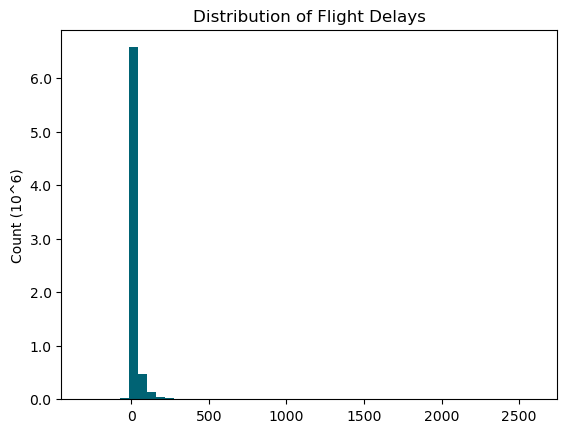

In [60]:
# yticks
y_ticks = np.arange(0,7e6,1e6)

# plot
plt.hist(x=airline_df.DepDelay, bins=50, color=base_color)
plt.title('Distribution of Flight Delays')
plt.ylabel('Count (10^6)')
plt.yticks(ticks=y_ticks, labels=y_ticks/1e6)

# save figure
plt.savefig('figures/hist_flight_delays_dist.png', facecolor='white',
            transparent=False, bbox_inches = "tight")

plt.show();

The distribution shows a high peak around 0 because most flights aren't delayed. Let's dig a bit deeper.

In [61]:
airline_df.DepDelay.value_counts().head(10)

 0.0    626236
-5.0    520603
-3.0    511311
-2.0    508707
-4.0    477747
-1.0    474151
-6.0    285009
 1.0    250564
-7.0    214359
 2.0    188005
Name: DepDelay, dtype: int64

There is a lot of negative flight delays i.e. early flights.

In [62]:
1.6e6

1600000.0

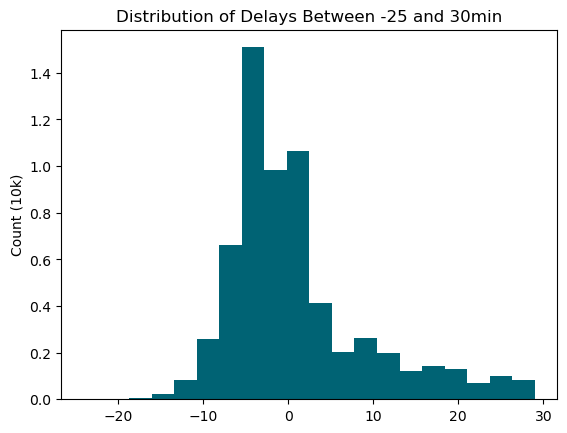

In [63]:
plotdata = airline_df.query('DepDelay < 30 & DepDelay > -25')['DepDelay']

# yticks
y_ticks = np.arange(0,16e5,2e5)

# plot
plt.hist(x=plotdata, bins=20, color=base_color)
plt.title('Distribution of Delays Between -25 and 30min')
plt.ylabel('Count (10k)')
plt.yticks(ticks=y_ticks, labels=y_ticks/1e6)

# save figure
plt.savefig('figures/hist_flight_delay_minus25_to_30.png', facecolor='white',
            transparent=False, bbox_inches = "tight")

plt.show();

Plot shows a normal distribution with majority of the flights being early. Let's ignore early and on-time flights and look at the delays

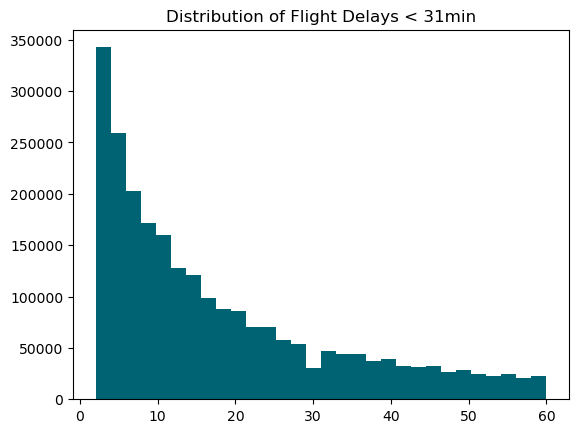

In [64]:
plotdata = airline_df.query('DepDelay > 1 & DepDelay < 61')['DepDelay']

# plot
plt.hist(plotdata, bins=30, color=base_color)
plt.title('Distribution of Flight Delays < 31min')

# save figure
plt.savefig('figures/hist_flight_delay_morethan_31min.png', facecolor='white',
            transparent=False, bbox_inches = "tight")

plt.show();

From the plot, it's obvious that the longer delays are less frequent.

### Grouping of Delays
Delays are divided into four categories, namely;

* OnTime_Early: Delay times that were less than or equal zero,
* Small_Delay: Delay time of less than 15 minutes,
* Medium_Delay: Delay times between 15 minutes and 45 minutes,
* Large_Delay: Delay times greater than 45 minutes.

[source](https://en.wikipedia.org/wiki/Flight_cancellation_and_delay#Performances)

In [65]:
# creating new column to hold group
airline_df['DelayGroup'] = None

# filling column with values based on delay duration
airline_df.loc[airline_df['DepDelay'] <= 0, 'DelayGroup'] = "OnTime_Early"
airline_df.loc[(airline_df['DepDelay'] > 0) & (airline_df['DepDelay'] <= 15), 'DelayGroup'] = "Small_Delay"
airline_df.loc[(airline_df['DepDelay'] > 15) & (airline_df['DepDelay'] <= 45), 'DelayGroup'] = "Medium_Delay"
airline_df.loc[airline_df['DepDelay'] > 45, 'DelayGroup'] = "Large_Delay"
airline_df.loc[airline_df['Cancelled'], 'DelayGroup'] = "Cancelled"

In [66]:
# checking if all delays got grouped
airline_df.DelayGroup.isna().sum()

0

In [67]:
airline_df.DelayGroup.value_counts(normalize=True)

OnTime_Early    0.556492
Small_Delay     0.219534
Medium_Delay    0.113748
Large_Delay     0.088658
Cancelled       0.021568
Name: DelayGroup, dtype: float64

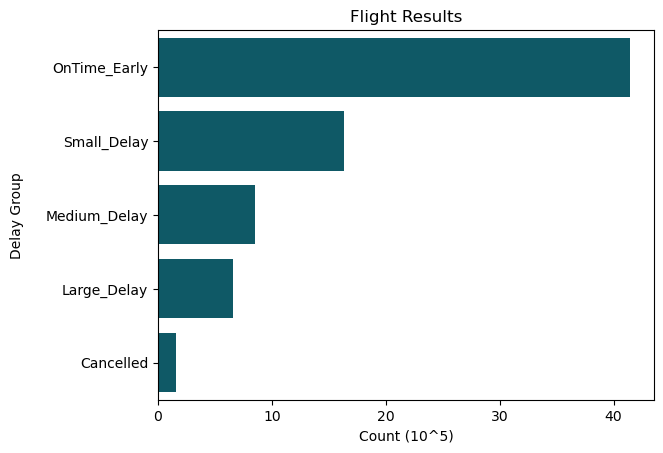

In [68]:
# yticks
x_ticks = np.arange(0,5e6,1e6)
x_labels = x_ticks/1e5
x_labels = x_labels.astype(int)

# bar order
bar_order = ['OnTime_Early', 'Small_Delay', 'Medium_Delay',
             'Large_Delay', 'Cancelled']

# plot data
sns.countplot(data=airline_df, y='DelayGroup',
              color=base_color, order=bar_order)
plt.title('Flight Results')
plt.xlabel('Count (10^5)')
plt.ylabel('Delay Group\n')
plt.xticks(ticks=x_ticks, labels=x_labels)

plt.show();

There are approximately 4,000,000 registered flights that were either on-time or early which is highest count when compared to other groups. Let's look at it proportionally.

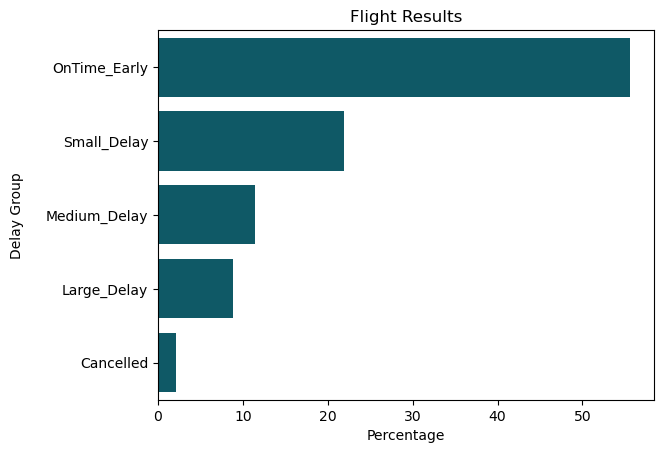

In [69]:
# plot data
plotdata = airline_df.DelayGroup.value_counts(normalize=True)
plotdata *= 100

sns.barplot(y=plotdata.index, x=plotdata.values, 
            color=base_color)
plt.title('Flight Results')
plt.xlabel('Percentage')
plt.ylabel('Delay Group\n')

# save figure
plt.savefig('figures/flight_result_barchart.png', facecolor='white',
            transparent=False, bbox_inches = "tight")

plt.show();

More than 50% of flights in 2007 were either on-time or early with just 21.95% experiencing a small delay and 2% cancelled.

### How does the Number of Registered Flights vary Per Month?

In [70]:
# get the first 3 letters of the month name for each date
airline_df['Month'] = airline_df['Date'].dt.month_name().str.slice(stop=3)

month = airline_df.Month.unique()
monthClass = pd.api.types.CategoricalDtype(categories=month, ordered=True)
airline_df['Month'] = airline_df['Month'].astype(monthClass)

In [71]:
plotdata = airline_df.groupby('Month')["Date"].count()
plotdata

Month
Jan    621557
Feb    565604
Mar    639209
Apr    614648
May    631609
Jun    629280
Jul    648544
Aug    653276
Sep    600186
Oct    629990
Nov    605148
Dec    614137
Name: Date, dtype: int64

In [72]:
plotdata.median()

625418.5

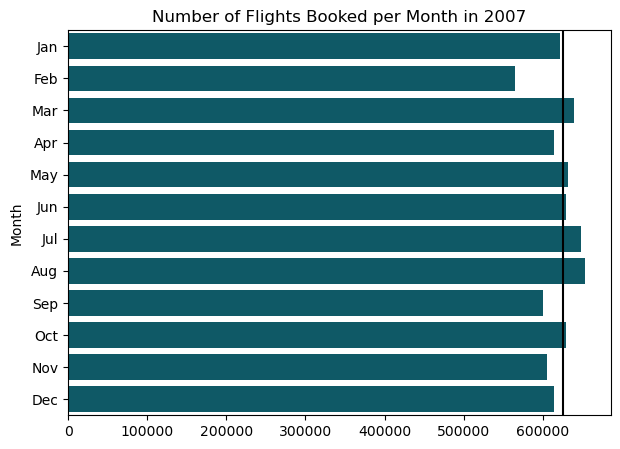

In [73]:
# bar plot
plt.figure(figsize=[7,5])
sns.barplot(y=plotdata.index, x=plotdata.values,
            color=base_color)
plt.axvline(x=plotdata.median(), color='black')
plt.title('Number of Flights Booked per Month in 2007')

# save figure
plt.savefig('figures/no_of_booked_flights_per_month.png', facecolor='white',
            transparent=False, bbox_inches = "tight")

plt.show();

Although the median number of bookings seems to be above 600,000 in 2007, February seems to have the least amount of flight bookings (565,604) while July and August have the most (648,544 and 653,276 respectively).

### What is the Distribution of Early, On-time, Delayed and Cancelled flights per Month?

In [74]:
# normalize=True, gets the proportion of each value by the row.
airline_df_agg = airline_df.groupby('Month')['DelayGroup'].value_counts(normalize=True).unstack()

# sorting columns
airline_df_agg = airline_df_agg[['OnTime_Early', 'Small_Delay', 'Medium_Delay',
                                 'Large_Delay', 'Cancelled']]

In [75]:
airline_df_agg*100

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
Jan,56.310684,21.386615,11.532008,8.232391,2.538303
Feb,49.655059,22.461652,13.199341,10.181682,4.502267
Mar,54.140508,22.615921,11.691012,8.912265,2.640294
Apr,57.661133,22.059781,10.485351,7.981642,1.812094
May,60.649706,21.661186,9.766960,6.839041,1.083107
Jun,48.317283,24.143942,13.026951,11.771707,2.740116
Jul,50.449160,23.540114,12.913388,11.014827,2.082511
Aug,52.421029,23.134479,12.415732,10.146707,1.882053
Sep,66.323440,18.665047,8.147641,5.779708,1.084164


In [76]:
airline_df_agg.sum(axis=1)

Month
Jan    1.0
Feb    1.0
Mar    1.0
Apr    1.0
May    1.0
Jun    1.0
Jul    1.0
Aug    1.0
Sep    1.0
Oct    1.0
Nov    1.0
Dec    1.0
dtype: float64

Let's get the percentage of each delay group for each month

In [77]:
(airline_df_agg*100).style.background_gradient(cmap='Blues', axis=1)

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
Jan,56.310684,21.386615,11.532008,8.232391,2.538303
Feb,49.655059,22.461652,13.199341,10.181682,4.502267
Mar,54.140508,22.615921,11.691012,8.912265,2.640294
Apr,57.661133,22.059781,10.485351,7.981642,1.812094
May,60.649706,21.661186,9.766960,6.839041,1.083107
Jun,48.317283,24.143942,13.026951,11.771707,2.740116
Jul,50.449160,23.540114,12.913388,11.014827,2.082511
Aug,52.421029,23.134479,12.415732,10.146707,1.882053
Sep,66.323440,18.665047,8.147641,5.779708,1.084164


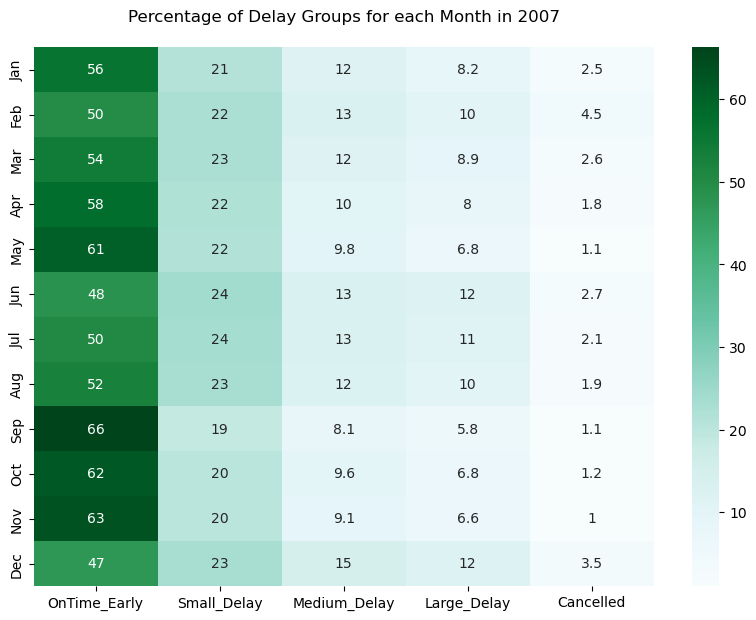

In [78]:
plt.figure(figsize=[10,7])
sns.heatmap((airline_df_agg*100), cmap='BuGn', annot=True)
plt.title('Percentage of Delay Groups for each Month in 2007\n')
plt.xlabel('')
plt.ylabel('')

# save figure
plt.savefig('figures/pct_of_DelayGroup_month.png', facecolor='white',
            transparent=False, bbox_inches = "tight")

plt.show();

We can see the gradual decrease in percentage of delays for each month. Let's look at a heatmap neglecting the OnTime_Flights

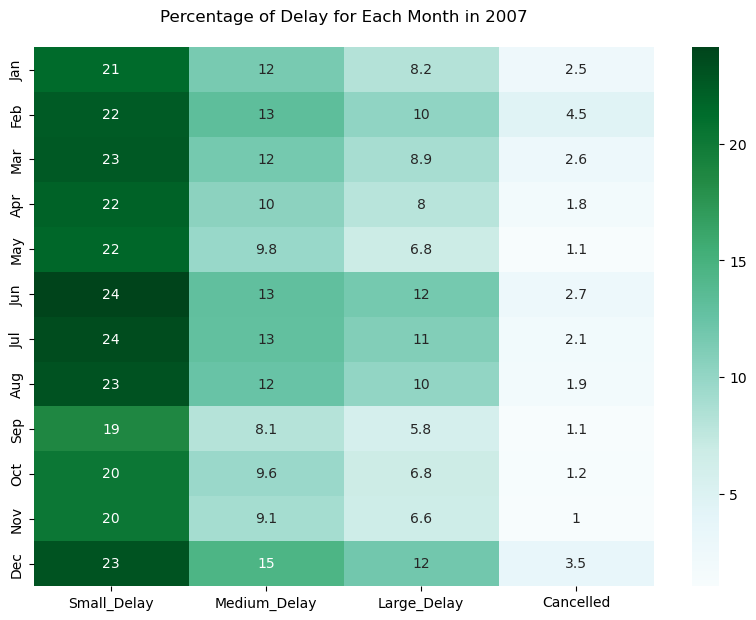

In [79]:
plt.figure(figsize=[10,7])
sns.heatmap((airline_df_agg.drop('OnTime_Early', axis=1)*100), 
            cmap='BuGn', annot=True)
plt.title('Percentage of Delay for Each Month in 2007\n')
plt.xlabel('')
plt.ylabel('')

# save figure
plt.savefig('figures/pct_of_DelayGroup_month_except_OnTime.png', facecolor='white',
            transparent=False, bbox_inches = "tight")

plt.show();

Most delays occurred between June, July, August and December while September to November had the highest percentage of on time flights. February then December saw the highest percentage of cancelled flights than all other months in 2007.

### What is the Distribution of Daily Flight Cancellations in 2007?

In [80]:
# get the daily number of cancelled flights.
# remember True=1 and False=0
cancelled_per_day = airline_df.groupby('Date')['Cancelled'].sum()

In [81]:
cancelled_per_day

Date
2007-01-01    359
2007-01-02    211
2007-01-03    177
2007-01-04    497
2007-01-05    580
             ... 
2007-12-27    486
2007-12-28    926
2007-12-29    171
2007-12-30    292
2007-12-31    524
Name: Cancelled, Length: 365, dtype: int64

In [82]:
cancelled_per_day.describe()[['min','max']]

min      52.0
max    4385.0
Name: Cancelled, dtype: float64

In [83]:
bins = np.arange(50,4400,250)
bins

array([  50,  300,  550,  800, 1050, 1300, 1550, 1800, 2050, 2300, 2550,
       2800, 3050, 3300, 3550, 3800, 4050, 4300])

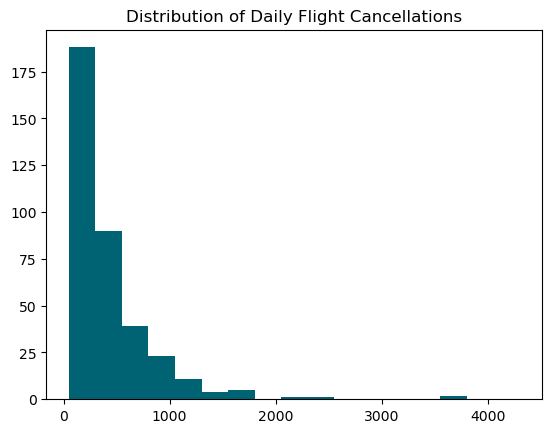

In [84]:
plt.hist(cancelled_per_day, bins=bins, color=base_color)
plt.title('Distribution of Daily Flight Cancellations')

# save figure
plt.savefig('figures/dist_daily_flight_cancellations.png', facecolor='white',
            transparent=False, bbox_inches = "tight")

plt.show();

Let's apply a log transform since this data is highly skewed to the right.

In [85]:
cancelled_per_day.describe()[['min','max']]

min      52.0
max    4385.0
Name: Cancelled, dtype: float64

Define functions for log transform plot

In [86]:
def log_range(series):
      '''To provide the log min and log max of a series'''
      
      # get min and max of series
      min = series.min()
      max = series.max()
      
      # get log of min and max
      log_min = np.log10(min)
      log_max = np.log10(max)
      
      return log_min, log_max

def round_down(num, digits=1):
      '''Round down values with precision'''
      factor = 10.0 ** digits
      
      return math.floor(num*factor) / factor

def round_up(num, digits=1):
      '''Round up values with precision'''
      factor = 10.0 ** digits
      
      return math.ceil(num*factor) / factor

def log_bin_list(series, step):
      '''Get the suitable bins for a log10 series'''
      
      # get log_min and log_max
      log_min, log_max = log_range(series)
      
      # rounding down min and rounding up max
      log_min = round_down(num=log_min)
      log_max = round_up(num=log_max)
      
      # get range from values
      bin_list = np.arange(log_min, log_max+step, step)
      
      return 10 ** bin_list

In [87]:
# generating bins
logBin_list = log_bin_list(cancelled_per_day, 0.1)

In [88]:
logBin_list.round()

array([  50.,   63.,   79.,  100.,  126.,  158.,  200.,  251.,  316.,
        398.,  501.,  631.,  794., 1000., 1259., 1585., 1995., 2512.,
       3162., 3981., 5012., 6310.])

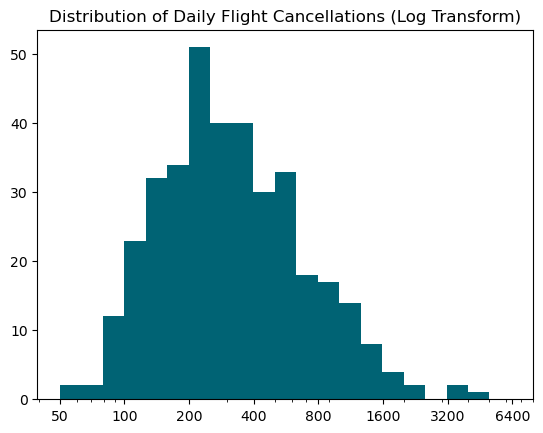

In [89]:
# generate the x-ticks you want to apply
ticks = [50, 100, 200, 400, 800, 1600, 3200, 6400]

# plot the histogram
plt.hist(cancelled_per_day, bins=logBin_list, color=base_color)
plt.xscale('log') # applying log transform [default base 10]

# apply xticks
plt.xticks(ticks, labels=ticks)
plt.title('Distribution of Daily Flight Cancellations (Log Transform)')

# save figure
plt.savefig('figures/daily_flights_cancellations_log.png', facecolor='white',
            transparent=False, bbox_inches = "tight")

plt.show();

Let's plot a calendar plot using the log transform values for `cancelled_per_day`

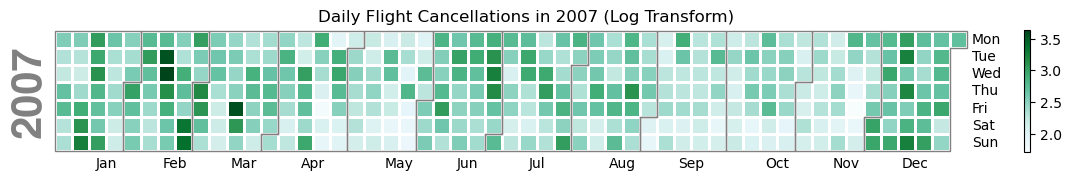

In [90]:
# plot
calplot.calplot(np.log10(cancelled_per_day), cmap='BuGn', colorbar=True,
                suptitle='Daily Flight Cancellations in 2007 (Log Transform)')

# save figure
plt.savefig('figures/calplot_log_daily_flight_cancellations.png', facecolor='white',
            transparent=False, bbox_inches = "tight")

plt.show();

From the plot above, we can see the days and weeks of each month that had the most cancellations.

### How does the No. of Registered Flights Compare Amongst Airlines?
Let's merge the carrier names with the carrier codes

Merging `carriers` with `airline_df`

In [91]:
airline_df = pd.merge(left=airline_df, right=carriers, how='left', 
                      left_on='UniqueCarrier', right_on='Code')

In [92]:
# renaming columns
airline_df.rename(columns={'Description':'AirlineName'}, inplace=True)
# dropping unnecessary column
airline_df.drop('Code', axis=1, inplace=True)

In [93]:
# converting description of US Airways inc to a shortform
longName = airline_df.query("AirlineName == 'US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)'")
longName_index = longName.index

In [94]:
airline_df.shape

(7453188, 25)

In [95]:
airline_df.iloc[longName_index,24] = 'US Airways Inc.'

In [96]:
airline_df.AirlineName.unique()

array(['Southwest Airlines Co.', 'Expressjet Airlines Inc.',
       'Mesa Airlines Inc.', 'Comair Inc.', 'Skywest Airlines Inc.',
       'United Air Lines Inc.', 'US Airways Inc.', 'Delta Air Lines Inc.',
       'Atlantic Southeast Airlines', 'Frontier Airlines Inc.',
       'AirTran Airways Corporation', 'Hawaiian Airlines Inc.',
       'American Eagle Airlines Inc.', 'Northwest Airlines Inc.',
       'Pinnacle Airlines Inc.', 'American Airlines Inc.',
       'Aloha Airlines Inc.', 'Alaska Airlines Inc.', 'JetBlue Airways',
       'Continental Air Lines Inc.'], dtype=object)

In [97]:
# creating dataframe with just counts of registered flights for each airline
plotdata = airline_df.groupby('AirlineName')[['DepTime']].count()

# sorting by decreasing count
plotdata.sort_values('DepTime', ascending=False, inplace=True)

# rename column
plotdata.rename(columns={'DepTime':'Count'}, inplace=True)

# reseting index, so that `UniqueCarrier` can be a column
plotdata.reset_index(inplace=True)

In [98]:
plotdata

,AirlineName,Count
0,Southwest Airlines Co.,1158878
1,American Airlines Inc.,615933
2,Skywest Airlines Inc.,583696
3,American Eagle Airlines Inc.,517702
4,United Air Lines Inc.,478073
5,US Airways Inc.,476505
6,Delta Air Lines Inc.,469368
7,Expressjet Airlines Inc.,423973
8,Northwest Airlines Inc.,406712
9,Continental Air Lines Inc.,320200


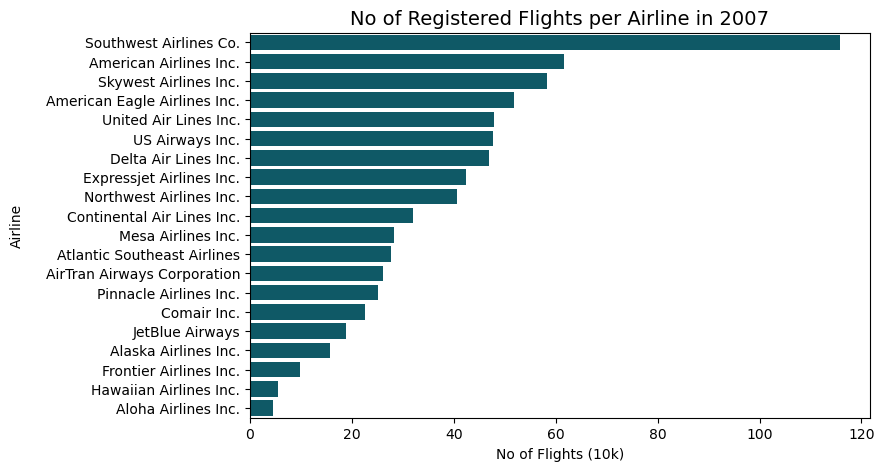

In [99]:
# plot
plt.figure(figsize=[8,5])
sns.barplot(x=(plotdata.Count/10000), y=plotdata.AirlineName,
            color=base_color)
plt.title('No of Registered Flights per Airline in 2007', fontsize=14)
plt.xlabel('No of Flights (10k)')
plt.ylabel('Airline\n')

# save figure
plt.savefig('figures/registered_flights_per_airline.png', facecolor='white',
            transparent=False, bbox_inches = "tight")

plt.show();

Southwest Airlines Co. seems to be the most popular airline in 2007 with a total of 1,158,878 registered flights followed by 'American Airlines Inc'. and 'Skywest Airlines Inc'. both having 615,933 and 583,696 registered flights respectively. The least used airline is 'Aloha Airlines Inc.' having just 45,972 booked flights.

### What is the Distribution of Delays for the Top Airlines
Let's look at airlines with more than 450k registered flights

In [100]:
# get list of flights with more than 450k
more_450 = plotdata.query('Count > 450_000')
more_450 = list(more_450.AirlineName)
more_450

['Southwest Airlines Co.',
 'American Airlines Inc.',
 'Skywest Airlines Inc.',
 'American Eagle Airlines Inc.',
 'United Air Lines Inc.',
 'US Airways Inc.',
 'Delta Air Lines Inc.']

In [101]:
# subsetting df
airline_more_450 = airline_df.query('AirlineName in @more_450')

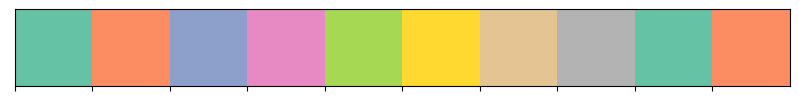

In [102]:
# choosing color palette
sns.palplot(sns.color_palette('Set2',10))
colors = sns.color_palette('Set2')[0:5]

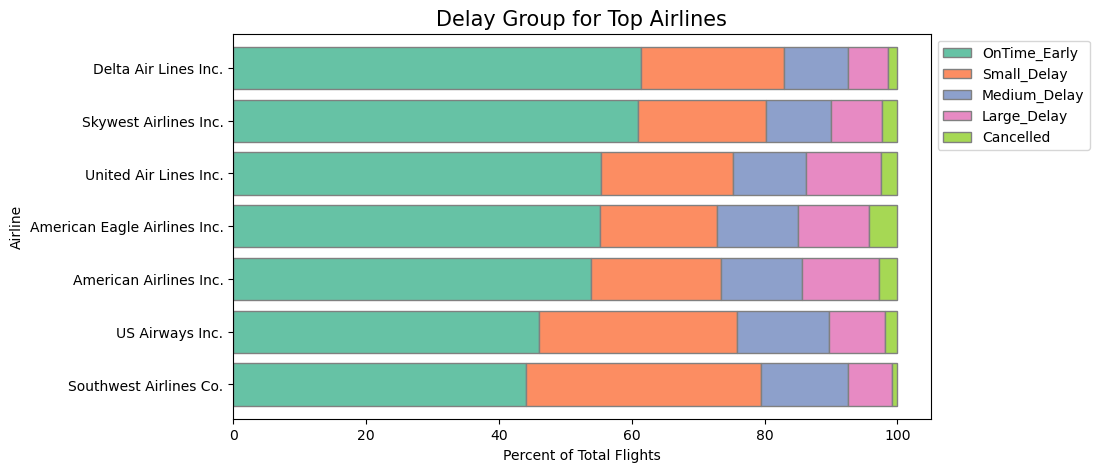

In [103]:
# finding counts of DelayGroup for each airline and normalizing the values.
airline_more_450_agg =  airline_more_450.groupby('AirlineName')['DelayGroup'].value_counts(normalize=True).unstack()

# ordering columns
col_order = ['OnTime_Early', 'Small_Delay', 'Medium_Delay', 'Large_Delay', 'Cancelled']
airline_more_450_agg = airline_more_450_agg[col_order]

# sort by 'OnTime_Early
airline_more_450_agg.sort_values(by='OnTime_Early', ascending=True, inplace=True)

# plot stacked barchart
fig, ax = plt.subplots(figsize=[9,5])
(airline_more_450_agg*100).plot(kind='barh', stacked=True, width=0.8,
                                color=colors, ax=ax, edgecolor='grey')
ax.set_title('Delay Group for Top Airlines', fontsize=15)
ax.set_xlabel('Percent of Total Flights')
ax.set_ylabel('Airline')
ax.legend(bbox_to_anchor=(1,1))

# save figure
plt.savefig('figures/delay_group_for_top_airlines.png', facecolor='white',
            transparent=False, bbox_inches = "tight")

plt.show();

We can notice that although Southwest Airlines had the most registered flights, it turns out that it has the least on-time or early flights (44%) out of the airlines in the 'more than 450k' group. While Delta Air Lines Inc., which comparatively had the least registered number of flights, turns out to have the most on-time or early flights with a value of 61%.

#### Grouping into Good and Bad Delay

In [104]:
# create map values
delay_mapping = {
      'OnTime_Early': 'Good', 
      'Small_Delay': 'Good', 
      'Medium_Delay': 'Bad', 
      'Large_Delay': 'Bad',
      'Cancelled': 'Bad'
}

# map values to 'DelayGroup' column
airline_more_450['DelayOK'] = airline_more_450['DelayGroup'].map(delay_mapping)


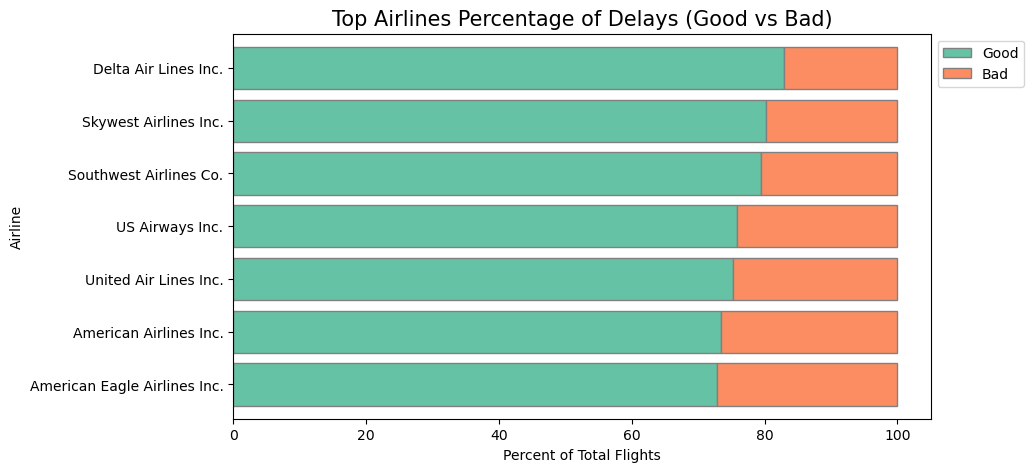

In [105]:
airline_more_450_agg =  airline_more_450.groupby('AirlineName')['DelayOK'].value_counts(normalize=True).unstack()

# ordering columns
airline_more_450_agg = airline_more_450_agg[['Good','Bad']]

# sort by 'OnTime_Early
airline_more_450_agg.sort_values(by='Good', ascending=True, inplace=True)

# plot stacked barchart
fig, ax = plt.subplots(figsize=[9,5])
(airline_more_450_agg*100).plot(kind='barh', stacked=True, width=0.8,
                                color=colors, ax=ax, edgecolor='grey')
ax.set_title('Top Airlines Percentage of Delays (Good vs Bad)', fontsize=15)
ax.set_xlabel('Percent of Total Flights')
ax.set_ylabel('Airline')
ax.legend(bbox_to_anchor=(1,1))

# save figure
plt.savefig('figures/top_airlines_pct_of_delays.png', facecolor='white',
            transparent=False, bbox_inches = "tight")

plt.show();

Delta Air Lines Inc. has the least bad delays overall while, of the top airlines, American Eagles Airlines Inc has the worst delays. 

## Findings & Conclusion
### Summary of Findings
Let's address the questions that were posed at the beginning of this exploration. 

#### Q1. Were there more delayed flights than there were early or on-time flights?
The dataset contained a lot of negative values, signifying the flights that were early.

![img](figures/hist_flight_delay_minus25_to_30.png)

As a result, departure delay was grouped into 4 categories;
* OnTime_Early: Delay times that were less than or equal zero,
* Small_Delay: Delay time of less than 15 minutes,
* Medium_Delay: Delay times between 15 minutes and 45 minutes,
* Large_Delay: Delay times greater than 45 minutes.

It was found that 55% of the flights in 2007 were either on-time or early with just 21.95% experiencing a small delay and 2% cancelled.

![img](figures/flight_result_barchart.png)
#### Q2. How does the number of registered flights vary per month?
Although the median number of bookings seemed to be above 600,000 in 2007, February seems to have the least amount of flight bookings (565,604) while July and August had the most (648,544 and 653,276 respectively).

![img](figures/no_of_booked_flights_per_month.png)

#### Q3. What is the distribution of early, on-time, delayed and cancelled flights per month?
There is clear and gradual decrease in percentage of delays for each month as seen in the heatmap below. 

![img](figures/pct_of_DelayGroup_month.png)

When looking at the distribution neglecting the on-time and early flights, we can notice that most delays occurred between June, July, August and December while September to November had the highest percentage of on time flights. February then December saw the highest percentage of cancelled flights than all other months in 2007.

![img](figures/pct_of_DelayGroup_month_except_OnTime.png)

#### Q4. What is the distribution of daily flight cancellations?
When plotting the log transform of the right skewed daily flight cancellations on a calendar plot, we can see basically 3 periods of increase in cancellations. From January to mid-April, then from June to August and from the last week of November to December.

![img](figures/calplot_log_daily_flight_cancellations.png)

#### Q5. How does the number of registered flights compare amongst airlines?
Southwest Airlines Co. seems to be the most popular airline in 2007 with a total of 1,158,878 registered flights followed by 'American Airlines Inc'. and 'Skywest Airlines Inc'. both having 615,933 and 583,696 registered flights respectively. The least used airline is 'Aloha Airlines Inc.' having just 45,972 booked flights.

![img](figures/registered_flights_per_airline.png)

#### Q6. What is the distribution of delays for the top airlines?
Airlines with more that 450k registered flights were classified as top airlines. Visualizing by delay group, we can notice that although Southwest Airlines had the most registered flights, it turns out that it has the least on-time or early flights (44%) out of the airlines in the 'more than 450k' group. While Delta Air Lines Inc., which comparatively had the least registered number of flights, turns out to have the most on-time or early flights with a value of 61%.

![img](figures/delay_group_for_top_airlines.png)

The delay groups were further grouped into 2 groups. Good delays represented the acceptable delays, covering on-time, early and small delay flights while bad delays covered the medium to Large delays and cancelled flights.

It was seen that Delta Air Lines Inc. has the least bad delays overall while, of the top airlines, American Eagles Airlines Inc has the worst delays.

![img](figures/top_airlines_pct_of_delays.png)

### Conclusion
In 2007, just over 50% of all registered flights were either on-time or early. The remaining approximately 45% were either delayed or outright cancelled. A majority of the delays and cancellations occured from January to mid-April, then from June to August and from the last week of November to December. Southwest Airlines Co. had the most registered flights (1,158,878 flights) but when compared to the top 7 airlines, it had the least percentage of on-time/early flights. When looking at acceptable delays (inclusive of on-time/early flights and small delays), both Delta Air Lines Inc and Skywest Airlines inc had the best acceptable delays while both American Airlines and American Eagles Airlines had the worst of the group. 

## Recommendations
* There are still more insights to be drawn from the complete dataset for 1987 to 2008. Tools for working with big data should be employed due to the large size of the combined data.
* Further analysis should look into questions which revolve around;
  * When is the best time of day/day of week/time of year to fly to minimise delays?
  * Do older planes suffer more delays?
  * How does the number of people flying between different locations change over time?
  * How well does weather predict plane delays?
  * Can you detect cascading failures as delays in one airport create delays in others? Are there critical links in the system?